In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor,plot_importance
import lightgbm as lgb

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
rc('font',family = 'Malgun Gothic')
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.feature_selection import SelectFromModel
np.random.seed(0)

data = pd.read_json('data_v3_COM.json',orient='table')

C:\Users\rhkd3\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def MAPE(y_true, y_pred):
    if y_true == 0:
        return 0
    else:
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.abs((y_true - y_pred) / y_true)

# 01. 기본 제공 데이터

In [3]:
df = data[['노출(분)', '마더코드', '상품코드', '상품군', '판매단가', '취급액']]
cloths = df[df['상품군']=='의류']
inwear = df[df['상품군']=='속옷']
kitchen = df[df['상품군']=='주방']
food = df[df['상품군']=='농수축']
skin = df[df['상품군']=='이미용']
digital = df[df['상품군']=='가전']
items = df[df['상품군']=='생활용품']
health = df[df['상품군']=='건강기능']
stuff = df[df['상품군']=='잡화']
furni = df[df['상품군']=='가구']
bedd = df[df['상품군']=='침구']

In [4]:
X1 = cloths[cloths.columns.difference(["취급액"])]
y1 = cloths["취급액"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3,random_state=42)

X2 = inwear[inwear.columns.difference(["취급액"])]
y2 = inwear["취급액"]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.3,random_state=42)

X3 = kitchen[kitchen.columns.difference(["취급액"])]
y3 = kitchen["취급액"]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,test_size=0.3,random_state=42)

X4 = food[food.columns.difference(["취급액"])]
y4 = food["취급액"]
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4,test_size=0.3,random_state=42)

X5 = skin[skin.columns.difference(["취급액"])]
y5 = skin["취급액"]
X5_train, X5_test, y5_train, y5_test = train_test_split(X5,y5,test_size=0.3,random_state=42)

X6 = digital[digital.columns.difference(["취급액"])]
y6 = digital["취급액"]
X6_train, X6_test, y6_train, y6_test = train_test_split(X6,y6,test_size=0.3,random_state=42)

X7 = items[items.columns.difference(["취급액"])]
y7 = items["취급액"]
X7_train, X7_test, y7_train, y7_test = train_test_split(X7,y7,test_size=0.3, random_state=42)

X8 = health[health.columns.difference(["취급액"])]
y8 = health["취급액"]
X8_train, X8_test, y8_train, y8_test = train_test_split(X8,y8,test_size=0.3,random_state=42)

X9 = stuff[stuff.columns.difference(["취급액"])]
y9 = stuff["취급액"]
X9_train, X9_test, y9_train, y9_test = train_test_split(X9,y9,test_size=0.3,random_state=42)

X10 = furni[furni.columns.difference(["취급액"])]
y10 = furni["취급액"]
X10_train, X10_test, y10_train, y10_test = train_test_split(X10,y10,test_size=0.3,random_state=42)

X11 = bedd[bedd.columns.difference(["취급액"])]
y11 = bedd["취급액"]
X11_train, X11_test, y11_train, y11_test = train_test_split(X11,y11,test_size=0.3,random_state=42)

X_train = pd.concat([X1_train,X2_train,X3_train,X4_train,X5_train,X6_train,X7_train,X8_train,X9_train,X10_train,X11_train])
X_test = pd.concat([X1_test,X2_test,X3_test,X4_test,X5_test,X6_test,X7_test,X8_test,X9_test,X10_test,X11_test])
y_train = pd.concat([y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train,y9_train,y10_train,y11_train])
y_test = pd.concat([y1_test,y2_test,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test,y9_test,y10_test,y11_test])

transformer = make_column_transformer(
    (OneHotEncoder(), ['상품군']),
    remainder='passthrough')
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

model = RandomForestRegressor(random_state=42,n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
ss = []
for i in range(len(y_pred)):
    ss.append(MAPE(y_test.tolist()[i],y_pred[i]))
mape=np.array(ss).mean()*100
print('기본제공데이터 RF mape: ',mape)

기본제공데이터 RF mape:  64.57980482354881


# 최종 선정된 데이터

In [5]:
df = data[[ '상품군','상품코드','마더코드', '판매단가', '취급액','수량','검색률2','방송_월',
       'lng_time','강수량(mm)', '습도(%)', '기온_int', '1시간평균 미세먼지농도', '소비지출전망CSI',
       '소비자심리지수','요일', 'pk_time_01', 'pk_times_prd', 'Open', '온라인 쇼핑몰 거래액','two_amt',
        '시간_범주', '성별', '일/무', '상품차이']]

cloths = df[df['상품군']=='의류']
inwear = df[df['상품군']=='속옷']
kitchen = df[df['상품군']=='주방']
food = df[df['상품군']=='농수축']
skin = df[df['상품군']=='이미용']
digital = df[df['상품군']=='가전']
items = df[df['상품군']=='생활용품']
health = df[df['상품군']=='건강기능']
stuff = df[df['상품군']=='잡화']
furni = df[df['상품군']=='가구']
bedd = df[df['상품군']=='침구']

X1 = cloths[cloths.columns.difference(["취급액","수량"])]
y1 = cloths["취급액"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3,random_state=42)

X2 = inwear[inwear.columns.difference(["취급액","수량"])]
y2 = inwear["취급액"]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.3,random_state=42)

X3 = kitchen[kitchen.columns.difference(["취급액","수량"])]
y3 = kitchen["취급액"]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,test_size=0.3,random_state=42)

X4 = food[food.columns.difference(["취급액","수량"])]
y4 = food["취급액"]
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4,test_size=0.3,random_state=42)

X5 = skin[skin.columns.difference(["취급액","수량"])]
y5 = skin["취급액"]
X5_train, X5_test, y5_train, y5_test = train_test_split(X5,y5,test_size=0.3,random_state=42)

X6 = digital[digital.columns.difference(["취급액","수량"])]
y6 = digital["취급액"]
X6_train, X6_test, y6_train, y6_test = train_test_split(X6,y6,test_size=0.3,random_state=42)

X7 = items[items.columns.difference(["취급액","수량"])]
y7 = items["취급액"]
X7_train, X7_test, y7_train, y7_test = train_test_split(X7,y7,test_size=0.3, random_state=42)

X8 = health[health.columns.difference(["취급액","수량"])]
y8 = health["취급액"]
X8_train, X8_test, y8_train, y8_test = train_test_split(X8,y8,test_size=0.3,random_state=42)

X9 = stuff[stuff.columns.difference(["취급액","수량"])]
y9 = stuff["취급액"]
X9_train, X9_test, y9_train, y9_test = train_test_split(X9,y9,test_size=0.3,random_state=42)

X10 = furni[furni.columns.difference(["취급액","수량"])]
y10 = furni["취급액"]
X10_train, X10_test, y10_train, y10_test = train_test_split(X10,y10,test_size=0.3,random_state=42)

X11 = bedd[bedd.columns.difference(["취급액","수량"])]
y11 = bedd["취급액"]
X11_train, X11_test, y11_train, y11_test = train_test_split(X11,y11,test_size=0.3,random_state=42)

X_train = pd.concat([X1_train,X2_train,X3_train,X4_train,X5_train,X6_train,X7_train,X8_train,X9_train,X10_train,X11_train])
X_test = pd.concat([X1_test,X2_test,X3_test,X4_test,X5_test,X6_test,X7_test,X8_test,X9_test,X10_test,X11_test])
y_train = pd.concat([y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train,y9_train,y10_train,y11_train])
y_test = pd.concat([y1_test,y2_test,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test,y9_test,y10_test,y11_test])

In [6]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['상품군','요일','시간_범주', '성별', '일/무', '상품차이']),
    remainder='passthrough')
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)
model = RandomForestRegressor(random_state=42,n_jobs=-1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
ss = []
for i in range(len(y_pred)):
    ss.append(MAPE(y_test.tolist()[i],y_pred[i]))
mape=np.array(ss).mean()*100
print('RF 전체 mape: ',mape)

RF 전체 mape:  60.12692527933334


# 판매단가가 비슷한 상품군 확인

In [7]:
a = pd.pivot_table(data[data['상품군']!='무형'],index=['상품군'],values='판매단가',aggfunc='mean').reset_index()
a

,상품군,판매단가
0,가구,8.434763e+05
1,가전,1.631382e+06
2,건강기능,8.332430e+04
3,농수축,4.642264e+04
4,생활용품,1.864539e+05
5,속옷,7.798127e+04
6,의류,1.555425e+05
7,이미용,5.103004e+04
8,잡화,4.694785e+05
9,주방,1.524328e+05


# 01. RF

In [8]:
df = data[[ '상품군', '판매단가', '취급액','수량','검색률2',
       'lng_time','강수량(mm)', '습도(%)', '기온_int', '1시간평균 미세먼지농도', '소비지출전망CSI',
       '소비자심리지수','요일', 'pk_time_01', 'pk_times_prd', 'Open', '온라인 쇼핑몰 거래액','two_amt',
        '시간_범주', '성별', '일/무', '상품차이','방송_월']]
cloths = df[df['상품군']=='의류']
inwear = df[df['상품군']=='속옷']
kitchen = df[df['상품군']=='주방']
food = df[df['상품군']=='농수축']
skin = df[df['상품군']=='이미용']
digital = df[df['상품군']=='가전']
items = df[df['상품군']=='생활용품']
health = df[df['상품군']=='건강기능']
stuff = df[df['상품군']=='잡화']
furni = df[df['상품군']=='가구']
bedd = df[df['상품군']=='침구']

In [9]:
X1 = cloths[cloths.columns.difference(["취급액","수량"])]
y1 = cloths["취급액"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3,random_state=42)

X2 = inwear[inwear.columns.difference(["취급액","수량"])]
y2 = inwear["취급액"]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.3,random_state=42)

X3 = kitchen[kitchen.columns.difference(["취급액","수량"])]
y3 = kitchen["취급액"]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,test_size=0.3,random_state=42)

X4 = food[food.columns.difference(["취급액","수량"])]
y4 = food["취급액"]
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4,test_size=0.3,random_state=42)

X5 = skin[skin.columns.difference(["취급액","수량"])]
y5 = skin["취급액"]
X5_train, X5_test, y5_train, y5_test = train_test_split(X5,y5,test_size=0.3,random_state=42)

X6 = digital[digital.columns.difference(["취급액","수량"])]
y6 = digital["취급액"]
X6_train, X6_test, y6_train, y6_test = train_test_split(X6,y6,test_size=0.3,random_state=42)

X7 = items[items.columns.difference(["취급액","수량"])]
y7 = items["취급액"]
X7_train, X7_test, y7_train, y7_test = train_test_split(X7,y7,test_size=0.3, random_state=42)

X8 = health[health.columns.difference(["취급액","수량"])]
y8 = health["취급액"]
X8_train, X8_test, y8_train, y8_test = train_test_split(X8,y8,test_size=0.3,random_state=42)

X9 = stuff[stuff.columns.difference(["취급액","수량"])]
y9 = stuff["취급액"]
X9_train, X9_test, y9_train, y9_test = train_test_split(X9,y9,test_size=0.3,random_state=42)

X10 = furni[furni.columns.difference(["취급액","수량"])]
y10 = furni["취급액"]
X10_train, X10_test, y10_train, y10_test = train_test_split(X10,y10,test_size=0.3,random_state=42)

X11 = bedd[bedd.columns.difference(["취급액","수량"])]
y11 = bedd["취급액"]
X11_train, X11_test, y11_train, y11_test = train_test_split(X11,y11,test_size=0.3,random_state=42)

x1_train = pd.concat([X10_train,X6_train,X9_train])
x2_train = pd.concat([X7_train,X1_train,X3_train])
x3_train = pd.concat([X2_train,X4_train,X5_train,X8_train,X11_train])
x1_test = pd.concat([X10_test,X6_test,X9_test])
x2_test = pd.concat([X7_test,X1_test,X3_test])
x3_test = pd.concat([X2_test,X4_test,X5_test,X8_test,X11_test])
yy1_train = pd.concat([y10_train,y6_train,y9_train])
yy2_train = pd.concat([y7_train,y1_train,y3_train])
yy3_train = pd.concat([y2_train,y4_train,y5_train,y8_train,y11_train])
yy1_test = pd.concat([y10_test,y6_test,y9_test])
yy2_test = pd.concat([y7_test,y1_test,y3_test])
yy3_test = pd.concat([y2_test,y4_test,y5_test,y8_test,y11_test])

### RF model 1_가구, 가전, 잡화

In [10]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['상품군','요일','시간_범주', '성별', '일/무', '상품차이']),
    remainder='passthrough')
transformer.fit(x1_train)
x1_train = transformer.transform(x1_train)
x1_test = transformer.transform(x1_test)

In [11]:
from sklearn.model_selection import RandomizedSearchCV
params = { 'n_estimators' : [200,300,400,500],
           'max_depth' : list(range(10,14)),
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestRegressor(random_state=42)
random_cv = RandomizedSearchCV(estimator=rf_clf,
                               param_distributions = params,
                               cv = 5,
                               n_jobs = -1)
random_cv.fit(x1_train, yy1_train)

print('최적 하이퍼 파라미터: ', random_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(random_cv.best_score_))

최적 하이퍼 파라미터:  {'n_estimators': 500, 'min_samples_split': 16, 'min_samples_leaf': 8, 'max_depth': 10}
최고 예측 정확도: 0.4179


In [12]:
random_cv.best_params_

{'n_estimators': 500,
 'min_samples_split': 16,
 'min_samples_leaf': 8,
 'max_depth': 10}

In [13]:
model1 = RandomForestRegressor(random_state=500, 
                               max_depth= random_cv.best_params_['max_depth'],
                               min_samples_leaf=random_cv.best_params_['min_samples_leaf'], 
                               min_samples_split=random_cv.best_params_['min_samples_split'],
                               n_estimators=random_cv.best_params_['n_estimators'],
                               n_jobs=-1)
model1.fit(x1_train,yy1_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=16, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=500, verbose=0, warm_start=False)

In [14]:
print("Train Score:", model1.score(x1_train, yy1_train))
print("Test Score:", model1.score(x1_test, yy1_test))

Train Score: 0.7082722860238386
Test Score: 0.6065200518242969


In [15]:
yy1_pred = model1.predict(x1_train)
ss1 = []
for i in range(len(yy1_pred)):
    ss1.append(MAPE(yy1_train.tolist()[i],yy1_pred[i]))
mape1=np.array(ss1).mean()*100
print('RF model 1 mape: ',mape1)

RF model 1 mape:  47.47256287595179


In [16]:
yy1_pred = model1.predict(x1_test)
ss1 = []
for i in range(len(yy1_pred)):
    ss1.append(MAPE(yy1_test.tolist()[i],yy1_pred[i]))
mape1=np.array(ss1).mean()*100
print('RF model 1 mape: ',mape1)

RF model 1 mape:  58.147022153306324


### RF model 2_생활용품, 의류, 주방

In [17]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['상품군','요일','시간_범주', '성별', '일/무', '상품차이']),
    remainder='passthrough')
transformer.fit(x2_train)
x2_train = transformer.transform(x2_train)
x2_test = transformer.transform(x2_test)

In [18]:
from sklearn.model_selection import RandomizedSearchCV
params = { 'n_estimators' : [200,300,400,500],
           'max_depth' : list(range(10,14)),
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestRegressor(random_state=42)
random_cv = RandomizedSearchCV(estimator=rf_clf,
                               param_distributions = params,
                               cv = 5,
                               n_jobs = -1)
random_cv.fit(x2_train, yy2_train)

print('최적 하이퍼 파라미터: ', random_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(random_cv.best_score_))

최적 하이퍼 파라미터:  {'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_depth': 13}
최고 예측 정확도: 0.6145


In [19]:
model2 = RandomForestRegressor(random_state=500, 
                               max_depth= random_cv.best_params_['max_depth'],
                               min_samples_leaf=random_cv.best_params_['min_samples_leaf'], 
                               min_samples_split=random_cv.best_params_['min_samples_split'],
                               n_estimators=random_cv.best_params_['n_estimators'],
                               n_jobs=-1)
model2.fit(x2_train,yy2_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=13, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=500, verbose=0, warm_start=False)

In [20]:
print("Train Score:", model2.score(x2_train, yy2_train))
print("Test Score:", model2.score(x2_test, yy2_test))

Train Score: 0.791730866010184
Test Score: 0.6686777653558067


In [21]:
yy2_pred = model2.predict(x2_train)
ss2 = []
for i in range(len(yy2_pred)):
    ss2.append(MAPE(yy2_train.tolist()[i],yy2_pred[i]))
mape2=np.array(ss2).mean()*100
print('RF model 1 mape: ',mape2)

RF model 1 mape:  53.93573282901303


In [22]:
yy2_pred = model2.predict(x2_test)
ss2 = []
for i in range(len(yy2_pred)):
    ss2.append(MAPE(yy2_test.tolist()[i],yy2_pred[i]))
mape2=np.array(ss2).mean()*100
print('RF model 1 mape: ',mape2)

RF model 1 mape:  72.88807832061231


### RF model 3_건강기능, 농수축, 속옷, 이미용, 침구

In [23]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['상품군','요일','시간_범주', '성별', '일/무', '상품차이']),
    remainder='passthrough')
transformer.fit(x3_train)
x3_train = transformer.transform(x3_train)
x3_test = transformer.transform(x3_test)

In [24]:
from sklearn.model_selection import RandomizedSearchCV
params = { 'n_estimators' : [200,300,400,500],
           'max_depth' : list(range(10,14)),
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestRegressor(random_state=42)
random_cv = RandomizedSearchCV(estimator=rf_clf,
                               param_distributions = params,
                               cv = 5,
                               n_jobs = -1)
random_cv.fit(x3_train, yy3_train)

print('최적 하이퍼 파라미터: ', random_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(random_cv.best_score_))

최적 하이퍼 파라미터:  {'n_estimators': 400, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_depth': 10}
최고 예측 정확도: 0.5526


In [25]:
model3 = RandomForestRegressor(random_state=500, 
                               max_depth= random_cv.best_params_['max_depth'],
                               min_samples_leaf=random_cv.best_params_['min_samples_leaf'], 
                               min_samples_split=random_cv.best_params_['min_samples_split'],
                               n_estimators=random_cv.best_params_['n_estimators'],
                               n_jobs=-1)
model3.fit(x3_train,yy3_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=-1, oob_score=False,
                      random_state=500, verbose=0, warm_start=False)

In [26]:
print("Train Score:", model3.score(x3_train, yy3_train))
print("Test Score:", model3.score(x3_test, yy3_test))

Train Score: 0.740312603786435
Test Score: 0.6472885721015846


In [27]:
yy3_pred = model3.predict(x3_train)
ss3 = []
for i in range(len(yy3_pred)):
    ss3.append(MAPE(yy3_train.tolist()[i],yy3_pred[i]))
mape3=np.array(ss3).mean()*100
print('RF model 3 mape: ',mape3)

RF model 3 mape:  50.0386002434837


In [28]:
yy3_pred = model3.predict(x3_test)
ss3 = []
for i in range(len(yy3_pred)):
    ss3.append(MAPE(yy3_test.tolist()[i],yy3_pred[i]))
mape3=np.array(ss3).mean()*100
print('RF model 1 mape: ',mape3)

RF model 1 mape:  59.21673552447469


## RF models mape

In [29]:
np.mean(ss1+ss2+ss3)*100

63.90112005647679

# 01. RandomForest

# 타겟의 변환 target을 log

In [30]:
def logg(x):
    if x == 0:
        return 0
    else:
        return np.log(x)
    
data['ln판매단가'] = list(map(logg,data['판매단가']))
data['ln수량'] = list(map(logg,data['수량']))

## 튜닝 이전

In [80]:
df = data[['노출(분)', '마더코드', '상품코드','상품군', '판매단가', '취급액','수량','검색률2',
       'lng_time','강수량(mm)', '습도(%)', '기온_int', '1시간평균 미세먼지농도', '소비지출전망CSI',
       '소비자심리지수','요일', 'pk_time_01', 'pk_times_prd', 'Open', '온라인 쇼핑몰 거래액','two_amt',
        '시간_범주', '성별', '일/무', '상품차이','방송_월',"ln수량","ln판매단가"]]

cloths = df[df['상품군']=='의류']
inwear = df[df['상품군']=='속옷']
kitchen = df[df['상품군']=='주방']
food = df[df['상품군']=='농수축']
skin = df[df['상품군']=='이미용']
digital = df[df['상품군']=='가전']
items = df[df['상품군']=='생활용품']
health = df[df['상품군']=='건강기능']
stuff = df[df['상품군']=='잡화']
furni = df[df['상품군']=='가구']
bedd = df[df['상품군']=='침구']

X1 = cloths[cloths.columns.difference(["취급액","수량","ln수량","판매단가"])]
y1 = cloths["ln수량"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)

X2 = inwear[inwear.columns.difference(["취급액","수량","ln수량","판매단가"])]
y2 = inwear["ln수량"]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2,random_state=42)

X3 = kitchen[kitchen.columns.difference(["취급액","수량","ln수량","판매단가"])]
y3 = kitchen["ln수량"]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,test_size=0.2,random_state=42)

X4 = food[food.columns.difference(["취급액","수량","ln수량","판매단가"])]
y4 = food["ln수량"]
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4,test_size=0.2,random_state=42)

X5 = skin[skin.columns.difference(["취급액","수량","ln수량","판매단가"])]
y5 = skin["ln수량"]
X5_train, X5_test, y5_train, y5_test = train_test_split(X5,y5,test_size=0.2,random_state=42)

X6 = digital[digital.columns.difference(["취급액","수량","ln수량","판매단가"])]
y6 = digital["ln수량"]
X6_train, X6_test, y6_train, y6_test = train_test_split(X6,y6,test_size=0.2,random_state=42)

X7 = items[items.columns.difference(["취급액","수량","ln수량","판매단가"])]
y7 = items["ln수량"]
X7_train, X7_test, y7_train, y7_test = train_test_split(X7,y7,test_size=0.2, random_state=42)

X8 = health[health.columns.difference(["취급액","수량","ln수량","판매단가"])]
y8 = health["ln수량"]
X8_train, X8_test, y8_train, y8_test = train_test_split(X8,y8,test_size=0.2,random_state=42)

X9 = stuff[stuff.columns.difference(["취급액","수량","ln수량","판매단가"])]
y9 = stuff["ln수량"]
X9_train, X9_test, y9_train, y9_test = train_test_split(X9,y9,test_size=0.2,random_state=42)

X10 = furni[furni.columns.difference(["취급액","수량","ln수량","판매단가"])]
y10 = furni["ln수량"]
X10_train, X10_test, y10_train, y10_test = train_test_split(X10,y10,test_size=0.2,random_state=42)

X11 = bedd[bedd.columns.difference(["취급액","수량","ln수량","판매단가"])]
y11 = bedd["ln수량"]
X11_train, X11_test, y11_train, y11_test = train_test_split(X11,y11,test_size=0.2,random_state=42)

X_train = pd.concat([X1_train,X2_train,X3_train,X4_train,X5_train,X6_train,X7_train,X8_train,X9_train,X10_train,X11_train])
X_test = pd.concat([X1_test,X2_test,X3_test,X4_test,X5_test,X6_test,X7_test,X8_test,X9_test,X10_test,X11_test])
y_train = pd.concat([y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train,y9_train,y10_train,y11_train])
y_test = pd.concat([y1_test,y2_test,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test,y9_test,y10_test,y11_test])

In [81]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['상품군','요일','시간_범주', '성별', '일/무', '상품차이']),
    remainder='passthrough')
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [82]:
model = RandomForestRegressor(random_state=42,n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = np.exp(y_pred)

y_pred = np.array(data[data.index.isin(y_test.index.tolist())]['판매단가'][y_test.index]*y_pred).tolist()
real = data[data.index.isin(y_test.index.tolist())]['취급액'][y_test.index].tolist()
ss = []
for i in range(len(y_pred)):
    ss.append(MAPE(real[i],y_pred[i]))
mape=np.array(ss).mean()*100
print('RF model mape: ',mape)

RF model mape:  41.57215038337556


In [86]:
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

## 튜닝 이후

In [87]:
df = data[['노출(분)', '마더코드', '상품코드','상품군', '판매단가', '취급액','수량','검색률2',
       'lng_time','강수량(mm)', '습도(%)', '기온_int', '1시간평균 미세먼지농도', '소비지출전망CSI',
       '소비자심리지수','요일', 'pk_time_01', 'pk_times_prd', 'Open', '온라인 쇼핑몰 거래액','two_amt',
        '시간_범주', '성별', '일/무', '상품차이','방송_월',"ln수량","ln판매단가"]]

cloths = df[df['상품군']=='의류']
inwear = df[df['상품군']=='속옷']
kitchen = df[df['상품군']=='주방']
food = df[df['상품군']=='농수축']
skin = df[df['상품군']=='이미용']
digital = df[df['상품군']=='가전']
items = df[df['상품군']=='생활용품']
health = df[df['상품군']=='건강기능']
stuff = df[df['상품군']=='잡화']
furni = df[df['상품군']=='가구']
bedd = df[df['상품군']=='침구']

X1 = cloths[cloths.columns.difference(["취급액","수량","ln수량","판매단가"])]
y1 = cloths["ln수량"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)

X2 = inwear[inwear.columns.difference(["취급액","수량","ln수량","판매단가"])]
y2 = inwear["ln수량"]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2,random_state=42)

X3 = kitchen[kitchen.columns.difference(["취급액","수량","ln수량","판매단가"])]
y3 = kitchen["ln수량"]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,test_size=0.2,random_state=42)

X4 = food[food.columns.difference(["취급액","수량","ln수량","판매단가"])]
y4 = food["ln수량"]
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4,test_size=0.2,random_state=42)

X5 = skin[skin.columns.difference(["취급액","수량","ln수량","판매단가"])]
y5 = skin["ln수량"]
X5_train, X5_test, y5_train, y5_test = train_test_split(X5,y5,test_size=0.2,random_state=42)

X6 = digital[digital.columns.difference(["취급액","수량","ln수량","판매단가"])]
y6 = digital["ln수량"]
X6_train, X6_test, y6_train, y6_test = train_test_split(X6,y6,test_size=0.2,random_state=42)

X7 = items[items.columns.difference(["취급액","수량","ln수량","판매단가"])]
y7 = items["ln수량"]
X7_train, X7_test, y7_train, y7_test = train_test_split(X7,y7,test_size=0.2, random_state=42)

X8 = health[health.columns.difference(["취급액","수량","ln수량","판매단가"])]
y8 = health["ln수량"]
X8_train, X8_test, y8_train, y8_test = train_test_split(X8,y8,test_size=0.2,random_state=42)

X9 = stuff[stuff.columns.difference(["취급액","수량","ln수량","판매단가"])]
y9 = stuff["ln수량"]
X9_train, X9_test, y9_train, y9_test = train_test_split(X9,y9,test_size=0.2,random_state=42)

X10 = furni[furni.columns.difference(["취급액","수량","ln수량","판매단가"])]
y10 = furni["ln수량"]
X10_train, X10_test, y10_train, y10_test = train_test_split(X10,y10,test_size=0.2,random_state=42)

X11 = bedd[bedd.columns.difference(["취급액","수량","ln수량","판매단가"])]
y11 = bedd["ln수량"]
X11_train, X11_test, y11_train, y11_test = train_test_split(X11,y11,test_size=0.2,random_state=42)

X_train = pd.concat([X1_train,X2_train,X3_train,X4_train,X5_train,X6_train,X7_train,X8_train,X9_train,X10_train,X11_train])
X_test = pd.concat([X1_test,X2_test,X3_test,X4_test,X5_test,X6_test,X7_test,X8_test,X9_test,X10_test,X11_test])
y_train = pd.concat([y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train,y9_train,y10_train,y11_train])
y_test = pd.concat([y1_test,y2_test,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test,y9_test,y10_test,y11_test])

In [88]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['상품군','요일','시간_범주', '성별', '일/무', '상품차이']),
    remainder='passthrough')
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [89]:
params = { 'max_depth' : list(range(10,14)),
           'min_samples_leaf' : [1,2,3,4],
           'min_samples_split' : [1,2,3,4]
            }

rf_clf = RandomForestRegressor(random_state=42,n_estimators=300)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 5, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 2}
최고 예측 정확도: 0.7971


In [90]:
model = grid_cv.best_estimator_
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = np.exp(y_pred)

y_pred = np.array(data[data.index.isin(y_test.index.tolist())]['판매단가'][y_test.index]*y_pred).tolist()
real = data[data.index.isin(y_test.index.tolist())]['취급액'][y_test.index].tolist()
ss = []
for i in range(len(y_pred)):
    ss.append(MAPE(real[i],y_pred[i]))
mape=np.array(ss).mean()*100
print('RF model mape: ',mape)

RF model mape:  45.24605990043784


# 02. Xgboost

## 튜닝 이전

In [38]:
import xgboost as xgb
df = data[['노출(분)', '마더코드', '상품코드','상품군', '판매단가', '취급액','수량','검색률2',
       'lng_time','강수량(mm)', '습도(%)', '기온_int', '1시간평균 미세먼지농도', '소비지출전망CSI',
       '소비자심리지수','요일', 'pk_time_01', 'pk_times_prd', 'Open', '온라인 쇼핑몰 거래액','two_amt',
        '시간_범주', '성별', '일/무', '상품차이','방송_월',"ln수량","ln판매단가"]]

encoder.fit(df['요일'])
df['요일'] = encoder.transform(df['요일'])

encoder.fit(df['시간_범주'])
df['시간_범주'] = encoder.transform(df['시간_범주'])

encoder.fit(df['상품군'])
df['상품군'] = encoder.transform(df['상품군'])

cloths = df[df['상품군']==6]
inwear = df[df['상품군']==5]
kitchen = df[df['상품군']==9]
food = df[df['상품군']==3]
skin = df[df['상품군']==7]
digital = df[df['상품군']==1]
items = df[df['상품군']==4]
health = df[df['상품군']==2]
stuff = df[df['상품군']==8]
furni = df[df['상품군']==0]
bedd = df[df['상품군']==10]

X1 = cloths[cloths.columns.difference(["취급액","수량","ln수량","판매단가"])]
y1 = cloths["ln수량"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)

X2 = inwear[inwear.columns.difference(["취급액","수량","ln수량","판매단가"])]
y2 = inwear["ln수량"]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2,random_state=42)

X3 = kitchen[kitchen.columns.difference(["취급액","수량","ln수량","판매단가"])]
y3 = kitchen["ln수량"]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,test_size=0.2,random_state=42)

X4 = food[food.columns.difference(["취급액","수량","ln수량","판매단가"])]
y4 = food["ln수량"]
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4,test_size=0.2,random_state=42)

X5 = skin[skin.columns.difference(["취급액","수량","ln수량","판매단가"])]
y5 = skin["ln수량"]
X5_train, X5_test, y5_train, y5_test = train_test_split(X5,y5,test_size=0.2,random_state=42)

X6 = digital[digital.columns.difference(["취급액","수량","ln수량","판매단가"])]
y6 = digital["ln수량"]
X6_train, X6_test, y6_train, y6_test = train_test_split(X6,y6,test_size=0.2,random_state=42)

X7 = items[items.columns.difference(["취급액","수량","ln수량","판매단가"])]
y7 = items["ln수량"]
X7_train, X7_test, y7_train, y7_test = train_test_split(X7,y7,test_size=0.2, random_state=42)

X8 = health[health.columns.difference(["취급액","수량","ln수량","판매단가"])]
y8 = health["ln수량"]
X8_train, X8_test, y8_train, y8_test = train_test_split(X8,y8,test_size=0.2,random_state=42)

X9 = stuff[stuff.columns.difference(["취급액","수량","ln수량","판매단가"])]
y9 = stuff["ln수량"]
X9_train, X9_test, y9_train, y9_test = train_test_split(X9,y9,test_size=0.2,random_state=42)

X10 = furni[furni.columns.difference(["취급액","수량","ln수량","판매단가"])]
y10 = furni["ln수량"]
X10_train, X10_test, y10_train, y10_test = train_test_split(X10,y10,test_size=0.2,random_state=42)

X11 = bedd[bedd.columns.difference(["취급액","수량","ln수량","판매단가"])]
y11 = bedd["ln수량"]
X11_train, X11_test, y11_train, y11_test = train_test_split(X11,y11,test_size=0.2,random_state=42)

X_train = pd.concat([X1_train,X2_train,X3_train,X4_train,X5_train,X6_train,X7_train,X8_train,X9_train,X10_train,X11_train])
X_test = pd.concat([X1_test,X2_test,X3_test,X4_test,X5_test,X6_test,X7_test,X8_test,X9_test,X10_test,X11_test])
y_train = pd.concat([y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train,y9_train,y10_train,y11_train])
y_test = pd.concat([y1_test,y2_test,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test,y9_test,y10_test,y11_test])

xgb_model = xgb.XGBRegressor(random_state=42)

print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)

30105 7531


XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [39]:
y_pred = xgb_model.predict(X_test)
y_pred = np.exp(y_pred)

y_pred = np.array(data[data.index.isin(y_test.index.tolist())]['판매단가'][y_test.index]*y_pred).tolist()
real = data[data.index.isin(y_test.index.tolist())]['취급액'][y_test.index].tolist()
ss = []
for i in range(len(y_pred)):
    ss.append(MAPE(real[i],y_pred[i]))
mape=np.array(ss).mean()*100
print('xgboost model mape: ',mape)

xgboost model mape:  37.34674850128637


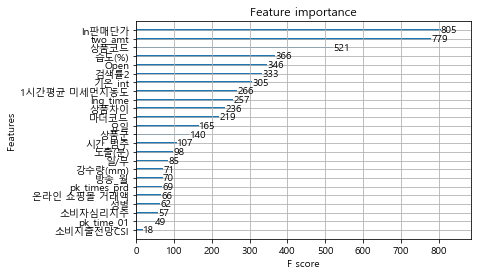

In [40]:
xgb.plot_importance(xgb_model)

## 튜닝 이후

In [41]:
import xgboost as xgb
df = data[['노출(분)', '마더코드', '상품코드','상품군', '판매단가', '취급액','수량','검색률2',
       'lng_time','강수량(mm)', '습도(%)', '기온_int', '1시간평균 미세먼지농도', '소비지출전망CSI',
       '소비자심리지수','요일', 'pk_time_01', 'pk_times_prd', 'Open', '온라인 쇼핑몰 거래액','two_amt',
        '시간_범주', '성별', '일/무', '상품차이','방송_월',"ln수량","ln판매단가"]]

encoder.fit(df['요일'])
df['요일'] = encoder.transform(df['요일'])

encoder.fit(df['시간_범주'])
df['시간_범주'] = encoder.transform(df['시간_범주'])

encoder.fit(df['상품군'])
df['상품군'] = encoder.transform(df['상품군'])

cloths = df[df['상품군']==6]
inwear = df[df['상품군']==5]
kitchen = df[df['상품군']==9]
food = df[df['상품군']==3]
skin = df[df['상품군']==7]
digital = df[df['상품군']==1]
items = df[df['상품군']==4]
health = df[df['상품군']==2]
stuff = df[df['상품군']==8]
furni = df[df['상품군']==0]
bedd = df[df['상품군']==10]

X1 = cloths[cloths.columns.difference(["취급액","수량","ln수량","판매단가"])]
y1 = cloths["ln수량"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)

X2 = inwear[inwear.columns.difference(["취급액","수량","ln수량","판매단가"])]
y2 = inwear["ln수량"]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2,random_state=42)

X3 = kitchen[kitchen.columns.difference(["취급액","수량","ln수량","판매단가"])]
y3 = kitchen["ln수량"]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,test_size=0.2,random_state=42)

X4 = food[food.columns.difference(["취급액","수량","ln수량","판매단가"])]
y4 = food["ln수량"]
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4,test_size=0.2,random_state=42)

X5 = skin[skin.columns.difference(["취급액","수량","ln수량","판매단가"])]
y5 = skin["ln수량"]
X5_train, X5_test, y5_train, y5_test = train_test_split(X5,y5,test_size=0.2,random_state=42)

X6 = digital[digital.columns.difference(["취급액","수량","ln수량","판매단가"])]
y6 = digital["ln수량"]
X6_train, X6_test, y6_train, y6_test = train_test_split(X6,y6,test_size=0.2,random_state=42)

X7 = items[items.columns.difference(["취급액","수량","ln수량","판매단가"])]
y7 = items["ln수량"]
X7_train, X7_test, y7_train, y7_test = train_test_split(X7,y7,test_size=0.2, random_state=42)

X8 = health[health.columns.difference(["취급액","수량","ln수량","판매단가"])]
y8 = health["ln수량"]
X8_train, X8_test, y8_train, y8_test = train_test_split(X8,y8,test_size=0.2,random_state=42)

X9 = stuff[stuff.columns.difference(["취급액","수량","ln수량","판매단가"])]
y9 = stuff["ln수량"]
X9_train, X9_test, y9_train, y9_test = train_test_split(X9,y9,test_size=0.2,random_state=42)

X10 = furni[furni.columns.difference(["취급액","수량","ln수량","판매단가"])]
y10 = furni["ln수량"]
X10_train, X10_test, y10_train, y10_test = train_test_split(X10,y10,test_size=0.2,random_state=42)

X11 = bedd[bedd.columns.difference(["취급액","수량","ln수량","판매단가"])]
y11 = bedd["ln수량"]
X11_train, X11_test, y11_train, y11_test = train_test_split(X11,y11,test_size=0.2,random_state=42)

X_train = pd.concat([X1_train,X2_train,X3_train,X4_train,X5_train,X6_train,X7_train,X8_train,X9_train,X10_train,X11_train])
X_test = pd.concat([X1_test,X2_test,X3_test,X4_test,X5_test,X6_test,X7_test,X8_test,X9_test,X10_test,X11_test])
y_train = pd.concat([y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train,y9_train,y10_train,y11_train])
y_test = pd.concat([y1_test,y2_test,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test,y9_test,y10_test,y11_test])

In [42]:
gridParams = {
    'learning_rate': [0.01,0.05,0.1],
    'colsample_bytree' : [0.65,0.7,0.8],
    'subsample' : [0.7,0.75,0.8],
    'gamma' : [0.05,0.1],
    'max_depth' : [8,10,12]
    }
model = xgb.XGBRegressor()

grid = GridSearchCV(model, gridParams,
                    verbose=0,
                    cv=5,
                    n_jobs=-1)

In [43]:
grid.fit(X_train, y_train)
grid.best_params_
bst = xgb.XGBRegressor(n_jobs = -1,
                          n_estimators=500,
                          max_depth = grid.best_params_['max_depth'],
                          subsample = grid.best_params_['subsample'],
                          learning_rate = grid.best_params_['learning_rate'],
                          gamma = grid.best_params_['gamma'],
                          colsample_bytree = grid.best_params_['colsample_bytree'],
                          random_state=42)

In [44]:
bst.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7, tree_method=None,
             validate_parameters=False, verbosity=None)

In [45]:
y_pred = bst.predict(X_test)
y_pred = np.exp(y_pred)

y_pred = np.array(data[data.index.isin(y_test.index.tolist())]['판매단가'][y_test.index]*y_pred).tolist()
real = data[data.index.isin(y_test.index.tolist())]['취급액'][y_test.index].tolist()
ss = []
for i in range(len(y_pred)):
    ss.append(MAPE(real[i],y_pred[i]))
mape=np.array(ss).mean()*100
print('xgboost model mape: ',mape)

xgboost model mape:  32.60315980839273


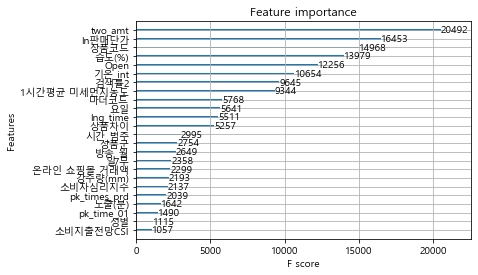

In [46]:
xgb.plot_importance(bst)

# 03. Light GBM

## 튜닝 이전

In [47]:
def logg(x):
    if x == 0:
        return 0
    else:
        return np.log(x)
    
data['ln판매단가'] = list(map(logg,data['판매단가']))
data['ln수량'] = list(map(logg,data['수량']))

In [48]:
df = data[['노출(분)', '마더코드', '상품코드','상품군', '판매단가', '취급액','수량','검색률2',
       'lng_time','강수량(mm)', '습도(%)', '기온_int', '1시간평균 미세먼지농도', '소비지출전망CSI',
       '소비자심리지수','요일', 'pk_time_01', 'pk_times_prd', 'Open', '온라인 쇼핑몰 거래액','two_amt',
        '시간_범주', '성별', '일/무', '상품차이','방송_월',"ln수량","ln판매단가"]]

encoder.fit(df['요일'])
df['요일'] = encoder.transform(df['요일'])

encoder.fit(df['시간_범주'])
df['시간_범주'] = encoder.transform(df['시간_범주'])

encoder.fit(df['상품군'])
df['상품군'] = encoder.transform(df['상품군'])

df['상품군'] = df['상품군'].astype('category')
df['방송_월'] = df['방송_월'].astype('category')
df['요일'] = df['요일'].astype('category')
df['시간_범주'] = df['시간_범주'].astype('category')
df['성별'] = df['성별'].astype('category')
df['일/무'] = df['일/무'].astype('category')
df['상품차이'] = df['상품차이'].astype('category')

In [49]:
cloths = df[df['상품군']==6]
inwear = df[df['상품군']==5]
kitchen = df[df['상품군']==9]
food = df[df['상품군']==3]
skin = df[df['상품군']==7]
digital = df[df['상품군']==1]
items = df[df['상품군']==4]
health = df[df['상품군']==2]
stuff = df[df['상품군']==8]
furni = df[df['상품군']==0]
bedd = df[df['상품군']==10]

In [50]:
X1 = cloths[cloths.columns.difference(["취급액","수량",'판매단가','ln수량'])]
y1 = cloths["ln수량"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)

X2 = inwear[inwear.columns.difference(["취급액","수량",'판매단가','ln수량'])]
y2 = inwear["ln수량"]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2,random_state=42)

X3 = kitchen[kitchen.columns.difference(["취급액","수량",'판매단가','ln수량'])]
y3 = kitchen["ln수량"]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,test_size=0.2,random_state=42)

X4 = food[food.columns.difference(["취급액","수량",'판매단가','ln수량'])]
y4 = food["ln수량"]
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4,test_size=0.2,random_state=42)

X5 = skin[skin.columns.difference(["취급액","수량",'판매단가','ln수량'])]
y5 = skin["ln수량"]
X5_train, X5_test, y5_train, y5_test = train_test_split(X5,y5,test_size=0.2,random_state=42)

X6 = digital[digital.columns.difference(["취급액","수량",'판매단가','ln수량'])]
y6 = digital["ln수량"]
X6_train, X6_test, y6_train, y6_test = train_test_split(X6,y6,test_size=0.2,random_state=42)

X7 = items[items.columns.difference(["취급액","수량",'판매단가','ln수량'])]
y7 = items["ln수량"]
X7_train, X7_test, y7_train, y7_test = train_test_split(X7,y7,test_size=0.2, random_state=42)

X8 = health[health.columns.difference(["취급액","수량",'판매단가','ln수량'])]
y8 = health["ln수량"]
X8_train, X8_test, y8_train, y8_test = train_test_split(X8,y8,test_size=0.2,random_state=42)

X9 = stuff[stuff.columns.difference(["취급액","수량",'판매단가','ln수량'])]
y9 = stuff["ln수량"]
X9_train, X9_test, y9_train, y9_test = train_test_split(X9,y9,test_size=0.2,random_state=42)

X10 = furni[furni.columns.difference(["취급액","수량",'판매단가','ln수량'])]
y10 = furni["ln수량"]
X10_train, X10_test, y10_train, y10_test = train_test_split(X10,y10,test_size=0.2,random_state=42)

X11 = bedd[bedd.columns.difference(["취급액","수량",'판매단가','ln수량'])]
y11 = bedd["ln수량"]
X11_train, X11_test, y11_train, y11_test = train_test_split(X11,y11,test_size=0.2,random_state=42)

X_train = pd.concat([X1_train,X2_train,X3_train,X4_train,X5_train,X6_train,X7_train,X8_train,X9_train,X10_train,X11_train])
X_test = pd.concat([X1_test,X2_test,X3_test,X4_test,X5_test,X6_test,X7_test,X8_test,X9_test,X10_test,X11_test])
y_train = pd.concat([y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train,y9_train,y10_train,y11_train])
y_test = pd.concat([y1_test,y2_test,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test,y9_test,y10_test,y11_test])

In [51]:
model = LGBMRegressor()
model.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [52]:
y_pred = model.predict(X_train)
y_pred = np.exp(y_pred)
y_pred = np.array(data[data.index.isin(y_train.index.tolist())]['판매단가'][y_train.index]*y_pred).tolist()
real = data[data.index.isin(y_train.index.tolist())]['취급액'][y_train.index].tolist()
ss = []
for i in range(len(y_pred)):
    ss.append(MAPE(real[i],y_pred[i]))
mape=np.array(ss).mean()*100
print('lightgbm model mape: ',mape)

lightgbm model mape:  37.34684064904746


In [53]:
y_pred = model.predict(X_test)
y_pred = np.exp(y_pred)
y_pred = np.array(data[data.index.isin(y_test.index.tolist())]['판매단가'][y_test.index]*y_pred).tolist()
real = data[data.index.isin(y_test.index.tolist())]['취급액'][y_test.index].tolist()
ss = []
for i in range(len(y_pred)):
    ss.append(MAPE(real[i],y_pred[i]))
mape=np.array(ss).mean()*100
print('lightgbm model mape: ',mape)

lightgbm model mape:  41.47843836802404


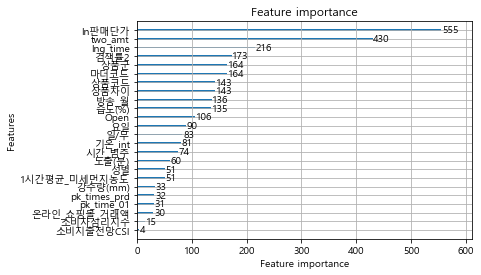

In [54]:
lgb.plot_importance(model)

## 튜닝 이후

In [64]:
df = data[['노출(분)', '마더코드', '상품코드','상품군', '판매단가', '취급액','수량','검색률2',
       'lng_time','강수량(mm)', '습도(%)', '기온_int', '1시간평균 미세먼지농도', '소비지출전망CSI',
       '소비자심리지수','요일', 'pk_time_01', 'pk_times_prd', 'Open', '온라인 쇼핑몰 거래액','two_amt',
        '시간_범주', '성별', '일/무', '상품차이','방송_월',"ln수량","ln판매단가"]]

encoder.fit(df['요일'])
df['요일'] = encoder.transform(df['요일'])

encoder.fit(df['시간_범주'])
df['시간_범주'] = encoder.transform(df['시간_범주'])

encoder.fit(df['상품군'])
df['상품군'] = encoder.transform(df['상품군'])

df['상품군'] = df['상품군'].astype('category')
df['방송_월'] = df['방송_월'].astype('category')
df['요일'] = df['요일'].astype('category')
df['시간_범주'] = df['시간_범주'].astype('category')
df['성별'] = df['성별'].astype('category')
df['일/무'] = df['일/무'].astype('category')
df['상품차이'] = df['상품차이'].astype('category')

In [65]:
cloths = df[df['상품군']==6]
inwear = df[df['상품군']==5]
kitchen = df[df['상품군']==9]
food = df[df['상품군']==3]
skin = df[df['상품군']==7]
digital = df[df['상품군']==1]
items = df[df['상품군']==4]
health = df[df['상품군']==2]
stuff = df[df['상품군']==8]
furni = df[df['상품군']==0]
bedd = df[df['상품군']==10]

In [66]:
X1 = cloths[cloths.columns.difference(["취급액","수량",'판매단가','ln수량'])]
y1 = cloths["ln수량"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)

X2 = inwear[inwear.columns.difference(["취급액","수량",'판매단가','ln수량'])]
y2 = inwear["ln수량"]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2,random_state=42)

X3 = kitchen[kitchen.columns.difference(["취급액","수량",'판매단가','ln수량'])]
y3 = kitchen["ln수량"]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,test_size=0.2,random_state=42)

X4 = food[food.columns.difference(["취급액","수량",'판매단가','ln수량'])]
y4 = food["ln수량"]
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4,test_size=0.2,random_state=42)

X5 = skin[skin.columns.difference(["취급액","수량",'판매단가','ln수량'])]
y5 = skin["ln수량"]
X5_train, X5_test, y5_train, y5_test = train_test_split(X5,y5,test_size=0.2,random_state=42)

X6 = digital[digital.columns.difference(["취급액","수량",'판매단가','ln수량'])]
y6 = digital["ln수량"]
X6_train, X6_test, y6_train, y6_test = train_test_split(X6,y6,test_size=0.2,random_state=42)

X7 = items[items.columns.difference(["취급액","수량",'판매단가','ln수량'])]
y7 = items["ln수량"]
X7_train, X7_test, y7_train, y7_test = train_test_split(X7,y7,test_size=0.2, random_state=42)

X8 = health[health.columns.difference(["취급액","수량",'판매단가','ln수량'])]
y8 = health["ln수량"]
X8_train, X8_test, y8_train, y8_test = train_test_split(X8,y8,test_size=0.2,random_state=42)

X9 = stuff[stuff.columns.difference(["취급액","수량",'판매단가','ln수량'])]
y9 = stuff["ln수량"]
X9_train, X9_test, y9_train, y9_test = train_test_split(X9,y9,test_size=0.2,random_state=42)

X10 = furni[furni.columns.difference(["취급액","수량",'판매단가','ln수량'])]
y10 = furni["ln수량"]
X10_train, X10_test, y10_train, y10_test = train_test_split(X10,y10,test_size=0.2,random_state=42)

X11 = bedd[bedd.columns.difference(["취급액","수량",'판매단가','ln수량'])]
y11 = bedd["ln수량"]
X11_train, X11_test, y11_train, y11_test = train_test_split(X11,y11,test_size=0.2,random_state=42)

X_train = pd.concat([X1_train,X2_train,X3_train,X4_train,X5_train,X6_train,X7_train,X8_train,X9_train,X10_train,X11_train])
X_test = pd.concat([X1_test,X2_test,X3_test,X4_test,X5_test,X6_test,X7_test,X8_test,X9_test,X10_test,X11_test])
y_train = pd.concat([y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train,y9_train,y10_train,y11_train])
y_test = pd.concat([y1_test,y2_test,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test,y9_test,y10_test,y11_test])

In [67]:
lgbm_r=LGBMRegressor()

gridParams = {
    'learning_rate': [0.1,0.01],
    'boosting_type' : ['gbdt'],
    'max_depth' : [12,14,16,18,20],
    'objective' : ['regression'],
    'feature_fraction' : [0.7, 0.8,0.9,0.6],
    'bagging_fraction' : [0.7, 0.8,0.6],
    'metric' : ['mse']
}

params = gridParams
model = lgb.LGBMRegressor()

grid = GridSearchCV(model, gridParams,
                    verbose=0,
                    cv=4,
                    n_jobs=-1)

grid.fit(X_train, y_train)

grid.best_params_

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


{'bagging_fraction': 0.7,
 'boosting_type': 'gbdt',
 'feature_fraction': 0.6,
 'learning_rate': 0.1,
 'max_depth': 14,
 'metric': 'mse',
 'objective': 'regression'}

In [68]:
params['feature_fraction'] = grid.best_params_['feature_fraction']
params['learning_rate'] = grid.best_params_['learning_rate']
params['bagging_fraction'] = grid.best_params_['bagging_fraction']
params['max_depth'] = grid.best_params_['max_depth']
print('Fitting with params: ')
print(params)

Fitting with params: 
{'learning_rate': 0.1, 'boosting_type': ['gbdt'], 'max_depth': 14, 'objective': ['regression'], 'feature_fraction': 0.6, 'bagging_fraction': 0.7, 'metric': ['mse']}


In [69]:
train_ds = lgb.Dataset(X_train, label = y_train) 
test_ds = lgb.Dataset(X_test, label = y_test)

model = lgb.train(params, train_ds, 10000, test_ds, verbose_eval=100, early_stopping_rounds=1000)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2361
[LightGBM] [Info] Number of data points in the train set: 30105, number of used features: 24
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 4.231181
Training until validation scores don't improve for 1000 rounds
[100]	valid_0's l2: 0.34495
[200]	valid_0's l2: 0.31477
[300]	valid_0's l2: 0.297078
[400]	valid_0's l2: 0.287759
[500]	valid_0's l2: 0.281729
[600]	valid_0's l2: 0

In [70]:
y_pred = model.predict(X_train)
y_pred = np.exp(y_pred)
y_pred = np.array(data[data.index.isin(y_train.index.tolist())]['판매단가'][y_train.index]*y_pred).tolist()
real = data[data.index.isin(y_train.index.tolist())]['취급액'][y_train.index].tolist()
ss = []
for i in range(len(y_pred)):
    ss.append(MAPE(real[i],y_pred[i]))
mape=np.array(ss).mean()*100
print('lightgbm model mape: ',mape)

lightgbm model mape:  12.46571294863214


In [71]:
y_pred = model.predict(X_test)
y_pred = np.exp(y_pred)
y_pred = np.array(data[data.index.isin(y_test.index.tolist())]['판매단가'][y_test.index]*y_pred).tolist()
real = data[data.index.isin(y_test.index.tolist())]['취급액'][y_test.index].tolist()
ss = []
for i in range(len(y_pred)):
    ss.append(MAPE(real[i],y_pred[i]))
mape=np.array(ss).mean()*100
print('lightgbm model mape: ',mape)

lightgbm model mape:  31.48268216297981


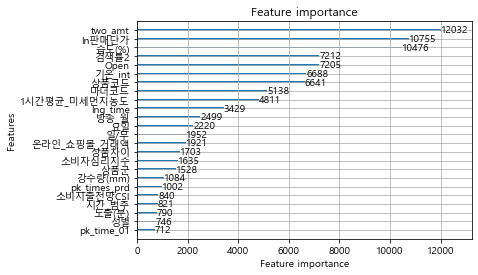

In [72]:
lgb.plot_importance(model)